# What is Machine Learning?

The area of computational science that focuses on analyzing and interpreting patterns and structures in data to enable learning, reasoning, and decision making outside of human interaction.

- Machine Learning is constantly and rapidly evolving
- Few standards are set in stone
- Stay tuned!

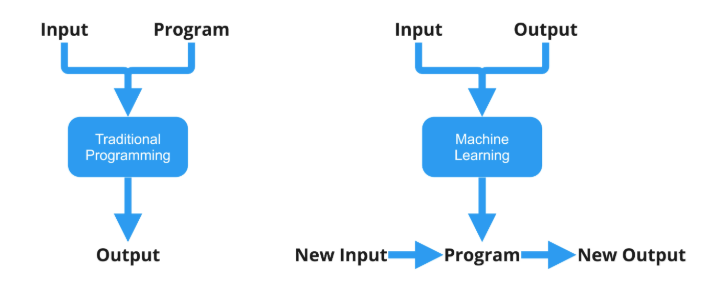

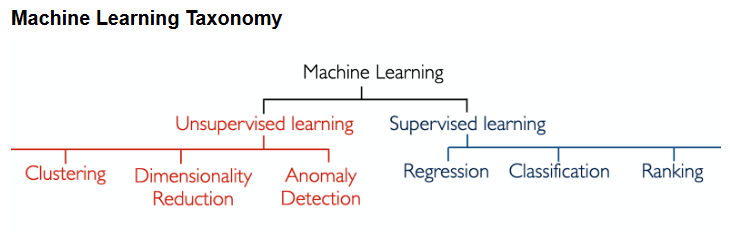



## Classification vs Regression


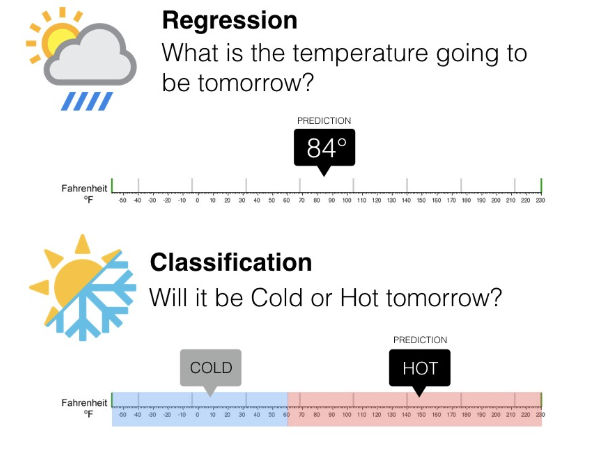

## Jargon

The __features__ can also be referred to as the __input, the X's, the variables.__

The __target__ can also be referred to as the __output, the y, the label, the class.__

The __samples__ can also be referred to as the __rows or the observations__

## ML stages

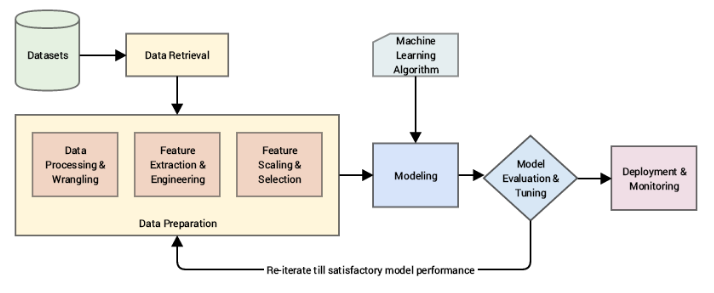

# Scikit-learn

Scikit-learn (Sklearn) is a Machine Learning library that provides data preprocessing, modeling, and model selection tools

https://scikit-learn.org

https://scikit-learn.org/stable/install.html

## Sklearn structure

- Sklearn is organized by modules
- Each module contains tools in the form of classes

## linear_model module

- linear_model is a module
- LinearRegression is a class

👉 [Sklearn linear_model documentation](https://scikit-learn.org/stable/api/index.html)

## Module and Class imports

In [1]:
import sklearn # this will not work with sklearn 
model = sklearn.linear_model.LinearRegression() # ❌

AttributeError: module 'sklearn' has no attribute 'linear_model'

In [2]:
import sklearn.linear_model # import of entire module
model = sklearn.linear_model.LinearRegression() # must type library and module prefix every time

In [3]:
from sklearn import linear_model # import of entire module
model = linear_model.LinearRegression() # must type module prefix every time

In [4]:
from sklearn.linear_model import * # import of entire module
model = LinearRegression()

### "Explicit is better than implicit" - The Zen of Python

In [5]:
from sklearn.linear_model import LinearRegression # explicit class import from module
model = LinearRegression() #=> we know where this object comes from

Is better to load only what we need in order to save space an memory, and it also makes the code easier to understand

# Linear Modeling with Sklearn

Linear Regression Recap
A Linear Regression (OLS) maps a linear relationship between the input __X__ and the output y. It optimizes slope a and intercept b by reducing the residuals between the actual y and the predicted y.

<code>y = aX + b</code>
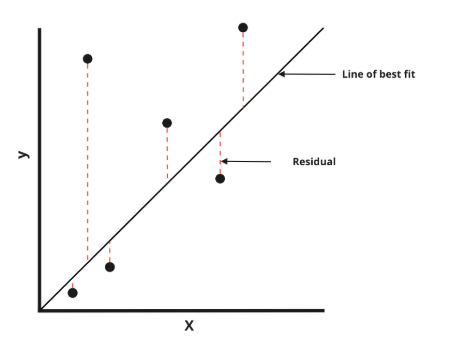

# Logistic Regression recap

Despite having "regression" in its name, Logistic Regression is actually a classifier. It uses a Sigmoid Function to map the probability of belonging to a class.

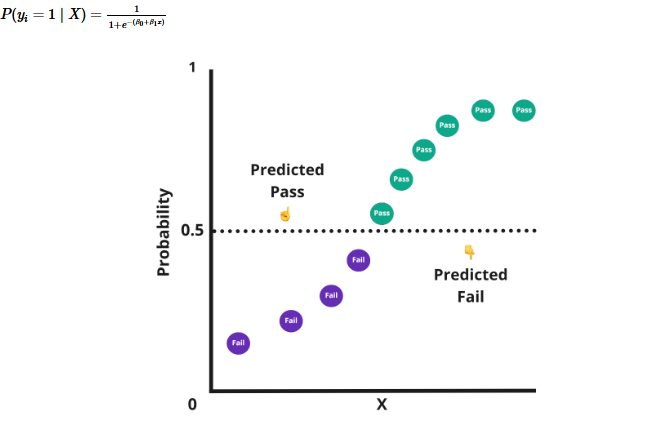

# Linear Regression with Sklearn

Consider the following dataset: ML_Houses_dataset.csv. It is a collection of houses and their characteristics, along with their sale price. The full documentation of the dataset is available [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset_description.txt)

In [8]:
import pandas as pd

data = pd.read_csv("ML_Houses_dataset.csv")
# Shuffling the data
data = data.sample(frac=1)

In [9]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
838,839,20,RL,75.0,9525,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,144000
1034,1035,30,RL,50.0,6305,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,119750
498,499,20,RL,65.0,7800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2009,WD,Normal,130000
702,703,60,RL,82.0,12438,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,New,Partial,361919
361,362,50,RL,NaN,9144,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,145000


__Let's start simple by modeling the SalePrice (y) according to the GrLivArea (X).__

In [10]:
livecode_data = data[['GrLivArea', 'SalePrice']]

livecode_data.head()

,GrLivArea,SalePrice
838,1099,144000
1034,954,119750
498,899,130000
702,2576,361919
361,1505,145000


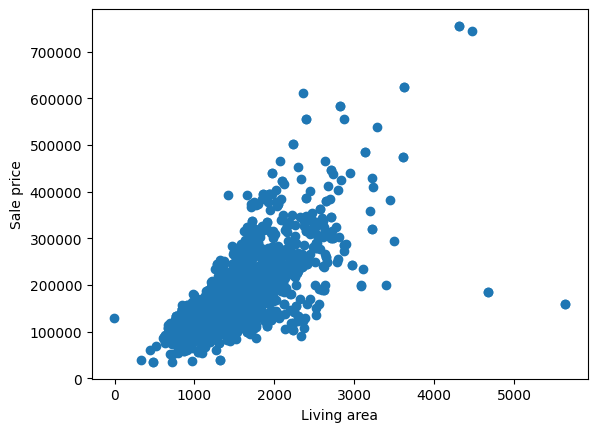

In [11]:
import matplotlib.pyplot as plt

# Plot Living area vs Sale price
plt.scatter(data['GrLivArea'], data['SalePrice'])

# Labels
plt.xlabel("Living area")
plt.ylabel("Sale price")

plt.show()

## Training
Training a Linear Regression model with Sklearn LinearRegression

In [12]:
# Import the model
from sklearn.linear_model import LinearRegression

# Instantiate the model (💡 in Sklearn often called "estimator")
model = LinearRegression()

# Define X and y
X = data[['GrLivArea']]
y = data['SalePrice']

# Train the model on the data
model.fit(X, y)

LinearRegression()

[👉 Sklearn LinearRegression documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

At this stage, the model has learned the optimal parameters - slope a and intercept b - needed to map the relationship between __X__ and __Y__.

### Model Attributes
__a (slope) and b (intercept)__ are stored as model attributes and can be accessed.

In [13]:
# View the model's slope (a)
model.coef_

array([105.00927564])

In [14]:
# View the model's intercept (b)
model.intercept_

22104.121010020666

### Scoring

Each Scikit-learn algorithm has a default scoring metric.

<code>LinearRegression</code> uses the Coefficient of Determination ($R^2$) by default.

- $R^2$represents the proportion of the variance of the target explained by the features.

- The score typically varies between 0 and 1 - usually less than 0.5 is bad

- The higher score the better the model

In [15]:
# Evaluate the model's performance
model.score(X, y)

0.48960426399689116

💡 Different models will have different default scoring metrics. You can look them up in the .score() [method in the model's docs.](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score)

For example, a classifier like LogisticRegression will default scoring to [accuracy.](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.score)

## Predicting
The trained model can be used to predict new data

In [16]:
# Predict on new data
new_data = pd.DataFrame({'GrLivArea': [1000]})

model.predict(new_data)

array([127113.39664561])

👉 An apartment with a surface area of 1000 $ft²$ has a predicted value of about U$127K.

## Sklearn modeling flow

1. Import the model: from sklearn import model
2. Instantiate the model: model = model()
3. Train the model: model.fit(X, y)
4. Evaluate the model: model.score(new_X, new_y)
5. Make predictions: model.predict(new_X)

❓ What did we do wrong when scoring the model's performance?

👉 We scored the model on the same data it was trained on!

# Generalization
The performance of a Machine Learning model is evaluated on its ability to generalize when predicting unseen data.

## The Holdout Method
The Holdout Method is used to evaluate a model's ability to generalize. It consists of splitting the dataset into two sets:

- Training set (~70%)
- Testing set (~30%)

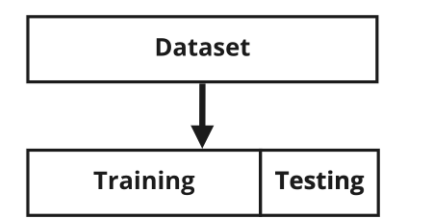


we basically leave some information from the data sate apart, and we don use it to train the model so we can use it later to test the predictions

### 💻 train_test_split
Let's model the __SalePrice (y)__ according to the __GrLivArea (X)__ whilst keeping generalization in mind.

In [17]:
livecode_data.head()

,GrLivArea,SalePrice
838,1099,144000
1034,954,119750
498,899,130000
702,2576,361919
361,1505,145000


#### Splitting

In [19]:
from sklearn.model_selection import train_test_split

# split the data into train and test
train_data, test_data = train_test_split(livecode_data, test_size=0.3)
# test size 0.3 = 30%

# Ready X's and y's
X_train = train_data[['GrLivArea']]
y_train = train_data['SalePrice']

X_test = test_data[['GrLivArea']]
y_test = test_data['SalePrice']

__You could also directly pass X and y to train_test_split.__

In [20]:
# Ready X and y
X = livecode_data[['GrLivArea']]
y = livecode_data['SalePrice']

# Split into Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Training and scoring

In [21]:
# Instantiate the model
model = LinearRegression()

# Train the model on the Training data
model.fit(X_train, y_train)

# Score the model on the Test data
model.score(X_test,y_test)

0.4880422176571839

### Data split is random
Different random splits will create different results

In [33]:
### RUN THIS CELL MULTIPLE TIMES TO SEE DIFFERENT SCORES

# Split into Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Instantiate the model
model = LinearRegression()

# Train the model on the Training data
model.fit(X_train, y_train)

# Score the model on the Test data
model.score(X_test,y_test)

0.5700709878565361

__We can use the random_state option, but we can be easily tempted to pick one with the best score 😈__

## K-Fold Cross Validation
1. The dataset is split into number of folds K
2. For each split, a sub-model is trained and scored
3. The average score of all sub-models is the cross-validated score of the model

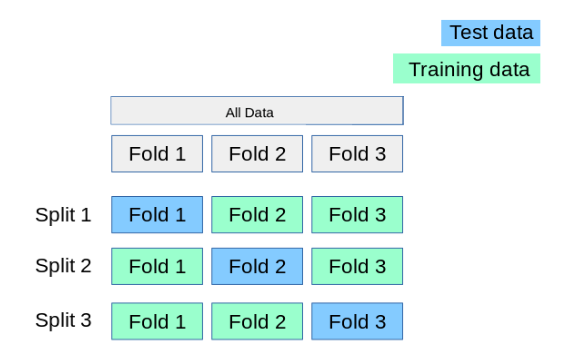

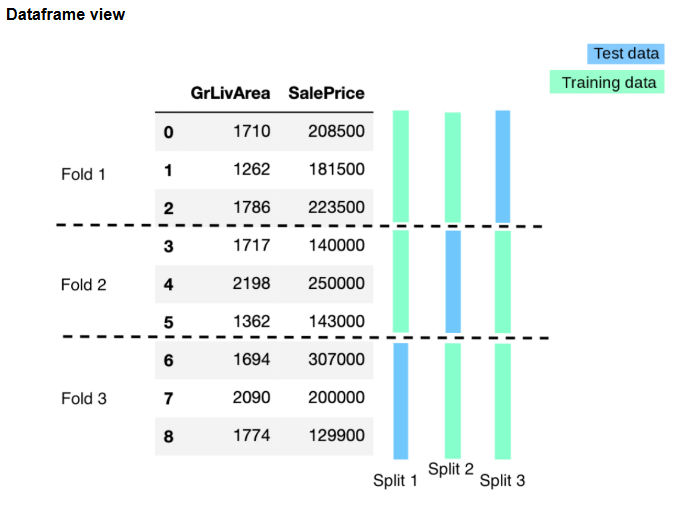

## 💻 cross_validate

In [34]:
from sklearn.model_selection import cross_validate

# Instantiate model
model = LinearRegression()

# 5-Fold Cross validate model
cv_results = cross_validate(model, X, y, cv=5)

# Scores
print(cv_results['test_score'])

# Mean of scores
cv_results['test_score'].mean()

[0.57150711 0.3051144  0.36902329 0.54420465 0.54738797]


0.46744748217856696

### Choosing K
Choosing K is a tradeoff between trustworthy performance evaluation and computational expense
More K-folds --> more sub-models to average scores from --> more representative score --> more computational time
ℹ️ Rule of thumb:  K=5
  or  
10
 

🚨 Cross-validation does not output a trained model, it only scores a hypothetical model trained on the entire dataset.